## regularization 正则化

可以把soft-margin SVM看作一个正则化问题(regularization problem)，正则化项加上损失函数

$$\min_f\quad\Omega(f)+C\sum_{i=1}^m\ell(f(\boldsymbol{x}_i),y_i),$$


其中$\Omega(f)$是正则化项，$C$是正则化常数，$\ell(z,y)$是损失函数。

可以给出正则化的两种解释：

1. 正则化可以把损失函数变成凸函数，从而使得优化算法更容易收敛到全局最优解。

2. 通过prior probability去解释

    我们要求$\underset{\theta}{\arg\max}{P(\theta|X,Y)}$,

    $$ P(\theta|X,Y) =\frac{P(Y|X,\theta)P(X|\theta)P(\theta)}{P(Y,X)}= \frac{P(Y|X,\theta)P(\theta)}{P(Y|X)} \sim P(Y|X,\theta)P(\theta)$$

    因为$X$和$\theta$是独立的，所以$P(X|\theta)=P(X)$。通过prior probability，我们可以把$P(\theta)$看作是模型参数的先验分布，$P(Y|X,\theta)$是模型的cost function，$P(Y|X)=1$不影响argmax计算，忽略。

    用极大似然法MLE估计，
    
    $$\underset{\theta}{\arg\max}L(\theta)=\prod_{i=1}^mp(y^{(i)}|x^{(i)};\theta)p(\theta)$$

    $$\underset{\theta}{\arg\max}-logL(\theta)=-\sum_{i=1}^m\log p(y^{(i)}|x^{(i)};\theta)-log p(\theta) \\ 
    = \text{loss function} - log p(\theta)$$
    

* L1 regularization (also called Lasso)

    假设$\theta$服从的先验分布为均值为0参数为$\lambda$的拉普拉斯分布，即$\theta \sim Laplace(\mu=0,\lambda)$

    $$p(\theta)=\frac{1}{2\lambda}\exp{-\frac{\mid\theta\mid}{\lambda}} $$ 
    $$\log p(\theta)=-\frac{\mid\theta\mid}{\lambda}+\log\frac{2}{\lambda}$$

* L2 regularization (also called Ridge)

    假设$\theta$服从的先验分布为均值为0参数为$\lambda$的高斯分布，即$\theta \sim N(0,\lambda^{-1})$

    $$p(\theta)=\frac{1}{\sqrt{2\pi\lambda}}e^{-\frac{\theta^2}{2\lambda}} $$ 
    $$\log p(\theta)=-\frac{\theta^2}{2\lambda}-\frac{1}{2}\log(2\pi\lambda)$$



Remark: 上面仅仅是一种解释，具体效果并没有给出数学的证明

## SMO (Sequential Minimal Optimization)

参考[SMO pdf](./assets/smo.pdf)

Remark：为什么我们要选择SMO算法，而不选择下面说的一些QP算法呢？

因为SMO算法涉及2维的矩阵运算，而其他QP算法涉m维矩阵运算，m为数据维度，当数据维度较高时，QP算法的计算量会很大，而SMO算法的计算量却很小。

---------------

model can be expressed as:

$$\begin{aligned}f(x)=\sum_{i=1}^m\alpha_iy^{(i)}\langle x^{(i)},x\rangle+b\end{aligned}$$

dual problem:

$$
\begin{aligned}\max_\alpha\quad&W(\alpha)=\sum_{i=1}^m\alpha_i-\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^my^{(i)}y^{(j)}\alpha_i\alpha_j\langle x^{(i)},x^{(j)}\rangle\end{aligned} \\
\begin{aligned}\text{subject to}\quad&\quad0\leq\alpha_i\leq C, &i=1,\dots,m\\&\quad\sum_{i=1}^m\alpha_iy^{(i)}=0\end{aligned}
$$

the bound of $\alpha_{j_{new}}$, since $\alpha_{i_{new}}y^{(i)} + \alpha_{j_{new}}y^{(j)} = \alpha_{i}y^{(i)} + \alpha_{j}y^{(j)}$, we have:

$$\begin{aligned}&\bullet\text{ If }y^{(i)}\neq y^{(j)},&&L=\max(0,\alpha_j-\alpha_i),&&H=\min(C,C+\alpha_j-\alpha_i)\\&\bullet\text{ If }y^{(i)}=y^{(j)},&&L=\max(0,\alpha_i+\alpha_j-C),&&H=\min(C,\alpha_i+\alpha_j)\end{aligned}$$

$$ L \leq \alpha_{j_{new}}\leq H $$


we get the maximal argument of the duality, through computing the derivative of $\alpha_{j_{new}}$ which equals to 0.

and we need to clip the new $\alpha$ whith the range $[L, H]$.

$$\begin{aligned}\alpha_{j_{new}}:=\alpha_j-\frac{y^{(j)}(E_i-E_j)}{\eta}\end{aligned}$$

where:

$$\begin{array}{rcl}E_k&=&f(x^{(k)})-y^{(k)}\\\eta&=&2\langle x^{(i)},x^{(j)}\rangle-\langle x^{(i)},x^{(i)}\rangle-\langle x^{(j)},x^{(j)}\rangle.\end{array}$$

clip:

$$\alpha_j:=\left\{\begin{array}{ll}H&\text{if }\alpha_j>H\\\alpha_j&\text{if }L\leq\alpha_j\leq H\\L&\text{if }\alpha_j<L.\end{array}\right.$$

and get:

$$\begin{aligned}\alpha_{i_{new}}:=\alpha_i+y^{(i)}y^{(j)}(\alpha_j-\alpha_{j}^{clip})\end{aligned}$$

computing b term:

since

$$ b = f(x) - \sum_{i=1}^{m}\alpha_i y_i <x_i, x> $$

we substitute $x_i$ and $x_j$ with $x$, get:

$$\begin{aligned}b_1=b-E_i-y^{(i)}(\alpha_i-\alpha_i^{(\text{old})})\langle x^{(i)},x^{(i)}\rangle-y^{(j)}(\alpha_j-\alpha_j^{(\text{old})})\langle x^{(i)},x^{(j)}\rangle.\end{aligned}$$

similarly, we get:
$$\begin{aligned}b_2=b-E_j-y^{(i)}(\alpha_i-\alpha_i^{(\text{old})})\langle x^{(i)},x^{(j)}\rangle-y^{(j)}(\alpha_j-\alpha_j^{(\text{old})})\langle x^{(j)},x^{(j)}\rangle.\end{aligned}$$

the finel value of $b$ is:

$$b:=\left\{\begin{array}{ll}b_1&\quad\text{if }0<\alpha_i<C\\b_2&\quad\text{if }0<\alpha_j<C\\(b_1+b_2)/2&\quad\text{otherwise}\end{array}\right.$$

in each iteration, we choose the $\alpha_i$ that most violates the KKT conditions, since it may converge most quickly.

## quadratic programming 二次规划

二次规划问题形式如下：

$$\begin{aligned}\min_{\boldsymbol{x}}&&\frac12\boldsymbol{x}^\mathrm{T}\mathbf{Q}\boldsymbol{x}+\boldsymbol{c}^\mathrm{T}\boldsymbol{x}\\\mathrm{s.t.}&&\mathbf{A}\boldsymbol{x}\leqslant\boldsymbol{b} ,\end{aligned}$$

SVM中的quadratic programming问题是：

$$\max_{{\boldsymbol{\alpha}}}\quad\sum_{i=1}^{m}\alpha_{i}-\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_{i}\alpha_{j}y_{i}y_{j}\boldsymbol{x}_{i}^{\mathrm{T}}\boldsymbol{x}_{j}\\
\begin{aligned}\text{s.t.}&\sum_{i=1}^m\alpha_iy_i=0 ,\\&\alpha_i\geqslant0 ,\quad i=1,2,\ldots,m .\end{aligned}$$


有多种解法，可以用gradient descent, stochastic gradient descent

* 下面是[stochastic gradient descent](https://blog.csdn.net/zzrisme/article/details/121878402)解法：

转换成无约束问题，不用dual problem
$$\underset{w}{\min}\|\mathrm{w}\|^{2}+\mathrm{C}\sum\max(0,1-\mathrm{y}_{\mathrm{i}}\mathrm{f}(\mathrm{x}_{\mathrm{i}}))$$

gradient descent (GD) for each iteration ($\eta$ is step length):

$$\mathrm{w_{t+1}}=\begin{cases}&\mathrm{w_t-\eta(\lambda w_t-\mathbb{E}(y_ix_i))}&\quad\mathrm{if~y_if(x_i)<1}\\&\mathrm{w_t-\eta\lambda w_t}&\quad\mathrm{if~y_if(x_i)\geq1}&\end{cases}$$

stochastic gradient descent (SGD),

$$\mathrm{w_{t+1}}=\begin{cases}&\mathrm{w_t-\eta(\lambda w_t-y_ix_i)}&\quad\mathrm{if~y_if(x_i)<1}\\&\mathrm{w_t-\eta\lambda w_t}&\quad\mathrm{if~y_if(x_i)\geq1}&\end{cases}$$


* 内点法 interior point method
* 增光拉格朗日法 augmented Lagrangian method (ALM)
* 交替方向乘子法 alternating direction method of multipliers (ADMM)

<https://zhuanlan.zhihu.com/p/181718998>

[IPM](https://apmonitor.com/me575/index.php/Main/InteriorPointMethod)

## multi-class probabilities

我们可以通过Platt scaling，即是通过logistic regressioin把点到超平面的距离转换为概率，来得到二分类的概率。

sklearn用的是[svmprob.pdf](https://www.csie.ntu.edu.tw/~cjlin/papers/svmprob/svmprob.pdf)的方法，把binary probability转换为multi-class probability。

multi-class方法很巧妙，且有严格的数学证明，很厉害。

# sklearn

## Problem 9

**Problem:**

Train a LinearSVC on a linearly separable dataset. Then train an SVC
and a SGDClassifier on the same dataset. See if you can get them to
produce roughly the same model.

In [7]:
import numpy as np
import pandas as pd
import os


iris_path = os.path.join(os.getcwd(), 'dataset', 'iris', 'iris.data')
# Load iris dataset
iris_data = pd.read_csv(iris_path, sep=',', header=None)
iris_data.columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


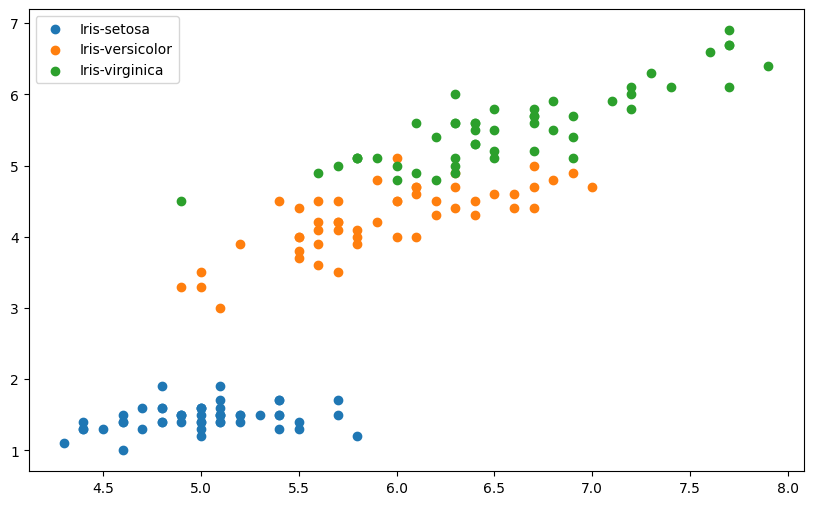

In [22]:
from matplotlib import pyplot as plt


def draw(col, X=iris_data):
    plt.figure(figsize=(10, 6))
    for class_name in np.unique(X.loc[:, 'class']):
        plt.scatter(X.loc[X['class']==class_name, col[0]],
                    X.loc[X['class']==class_name, col[1]], 
                    label=class_name,
        )
    plt.legend()
    plt.show()

draw(['sepal_length', 'petal_length'])

选择两组分开的数据，features为2维，label为binary, 生成数据集。

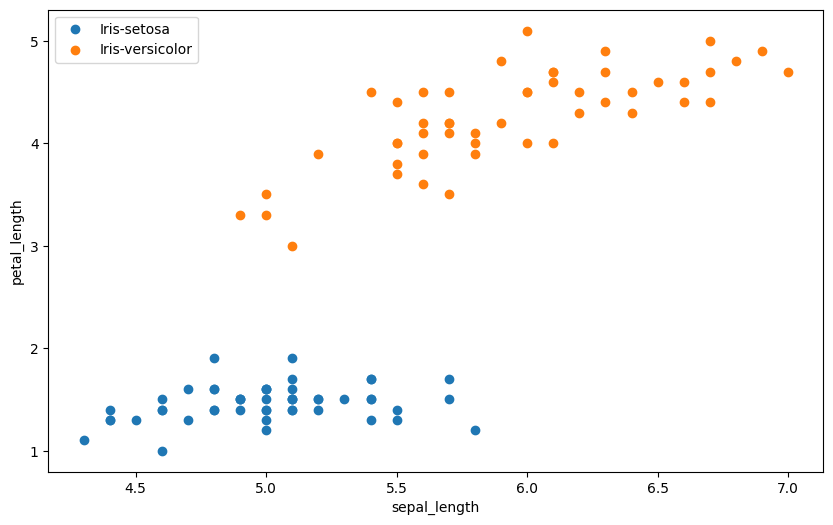

In [87]:
features = ['sepal_length', 'petal_length']
classes = ['Iris-setosa', 'Iris-versicolor']

# randomly sample iris data 
np.random.seed(0)
iris_data_sample = iris_data.sample(frac=1, random_state=0).reset_index(drop=True)
X = iris_data_sample.loc[iris_data_sample['class'].isin(classes), features]
y = iris_data_sample.loc[iris_data_sample['class'].isin(classes), 'class']

plt.figure(figsize=(10, 6))
def scatter_selected():
    for cls in classes:
        plt.scatter(X.loc[y==cls, features[0]],
                    X.loc[y==cls, features[1]],
                    label=cls)
scatter_selected()
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

对上面的数据分别用linear SVM和SGD classifier进行分类


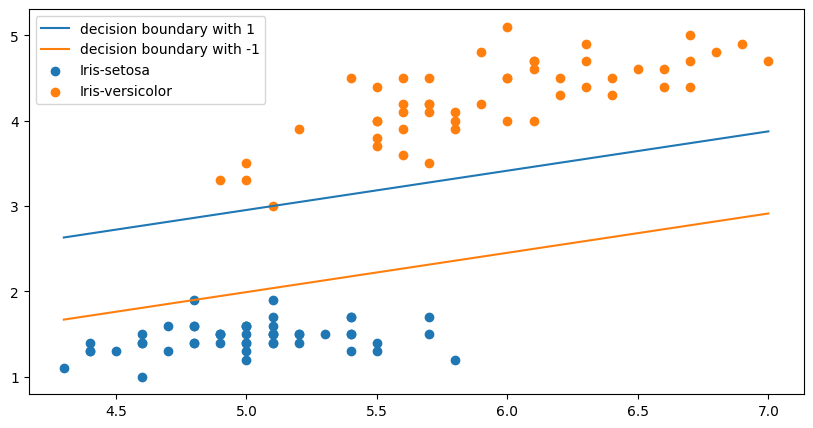

In [185]:
from sklearn.svm import LinearSVC, SVC

# reset index
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
# linear SVM
svc_clf = LinearSVC(C=10**7, random_state=42)
svc_clf.fit(X, y)
plt.figure(figsize=(10, 5))
def plot_linear_svc(f_x: int, clf):
    # draw f_x = w.T*x + b
    w, b = clf.coef_, clf.intercept_
    w, b = w.ravel(), b.ravel()
    x_axis = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100)
    y_axis = (f_x - w[0] * x_axis - b) / w[1]
    plt.plot(x_axis, y_axis, label=f'decision boundary with {f_x}')
plot_linear_svc(1, svc_clf)
plot_linear_svc(-1, svc_clf)
scatter_selected()
plt.legend()
plt.show()

SGD Classifier with parameter loss='hinge' is the same as SVM with kernel='linear' and loss='hinge'.

the difference is that SGDClassifier solve the primal problem directly, while SVM solve the dual problem.

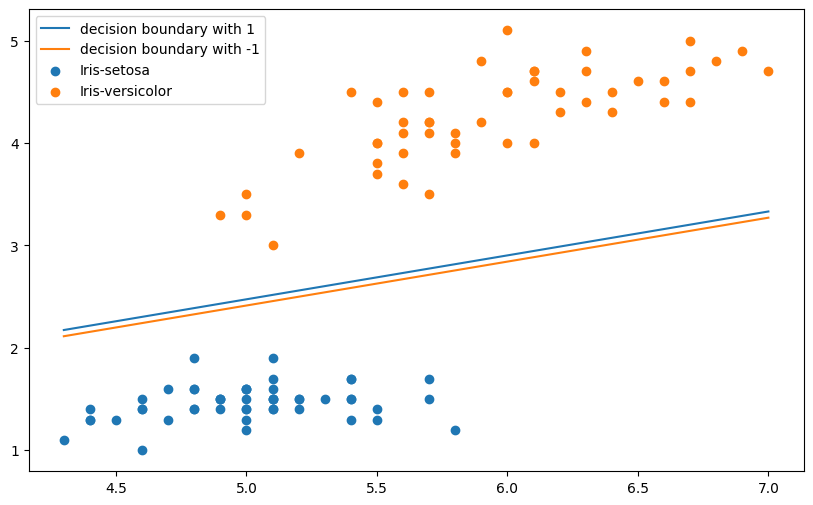

In [206]:
# SGD classifier
from sklearn.linear_model import SGDClassifier

y_sgd = y.copy()
y_sgd[y_sgd==classes[0]] = 1
y_sgd[y_sgd==classes[1]] = -1
y_sgd = y_sgd.astype(int)
sgd_clf = SGDClassifier(random_state=42, loss='hinge', 
                        penalty='l2', alpha=10**-4,
                        max_iter=3000)
sgd_clf.fit(X, y)

# plottint decision boundary
plt.figure(figsize=(10, 6))
plot_linear_svc(1, sgd_clf)
plot_linear_svc(-1, sgd_clf)
scatter_selected()
plt.legend()
plt.show()


Remark:

since the objective function of SGD Classifier is 

$$E(w,b)=\frac1n\sum_{i=1}^nL(y_i,f(x_i))+\alpha R(w)$$

the regression term is too small, so it has a large numerical error. I guess that is the reason why the $f(x)=\omega^Tx+b=1$ does not pass the support vector.

## Problem 10

**Problem:**

Train an SVM classifier on the wine dataset, which you can load using
sklearn.datasets.load_wine(). This dataset contains the chemical
analyses of 178 wine samples produced by 3 different cultivators: the
goal is to train a classification model capable of predicting the cultivator
based on the wine’s chemical analysis. Since SVM classifiers are binary
classifiers, you will need to use one-versus-all to classify all three
classes. What accuracy can you reach?

In [41]:
# preprocess the data
import numpy as np
import pandas as pd
import os


# load the data
wine_path = os.path.join(os.getcwd(), 'dataset', 'wine', 'wine.data')
wine_data = pd.read_csv(wine_path, header=None, sep=',')
attributes = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine_data.columns = attributes

X = wine_data.iloc[:, 1:]
y = wine_data.iloc[:, 0]
wine_data.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


* use linear SVC to classify the wine dataset

In [228]:
# train the SVC model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split


pipeline = Pipeline([
    ('Scalar', StandardScaler()),
    ('SVM', OneVsRestClassifier(SVC(kernel='linear', C=1)))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test = \
    X_train.reset_index(drop=True), X_test.reset_index(drop=True), \
        y_train.reset_index(drop=True), y_test.reset_index(drop=True)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('Scalar', StandardScaler()),
                ('SVM',
                 OneVsRestClassifier(estimator=SVC(C=1, kernel='linear')))])

In [229]:
# predict the test data
from sklearn.metrics import accuracy_score


y_pred = pipeline.predict(X_test)
print("Test Accuracy of linear kernel SVC:", accuracy_score(y_test, y_pred))

Test Accuracy of linear kernel SVC: 1.0


but the result above is depend on the random state, so we need to compare the performance through cross-validation method.

* compare the performance of SVC with different kernels

In [234]:
from sklearn.model_selection import GridSearchCV


scalar = StandardScaler()
scalar.fit(X)
X_scalar = scalar.transform(X)

params = {'kernel': ['linear', 'rbf', 'poly','sigmoid'], 'C': [1]}
grid_search = GridSearchCV(
    estimator=SVC(), param_grid=params, cv=5, scoring='accuracy'
)
grid_search.fit(X_scalar, y)
results = grid_search.cv_results_
# print results
for params, mean_test_score, std_test_score in zip(
    results['params'], results['mean_test_score'], results['std_test_score']
):
    print(params)
    print(f"mean test score: {mean_test_score}, std test score: {std_test_score}")

{'C': 1, 'kernel': 'linear'}
mean test score: 0.9550793650793651, std test score: 0.0136876578649588
{'C': 1, 'kernel': 'rbf'}
mean test score: 0.9833333333333334, std test score: 0.022222222222222233
{'C': 1, 'kernel': 'poly'}
mean test score: 0.9436507936507935, std test score: 0.03145101010754798
{'C': 1, 'kernel': 'sigmoid'}
mean test score: 0.9722222222222221, std test score: 0.03513641844631534


## Problem 11

**Problem:**

Train and fine-tune an SVM regressor on the California housing dataset.
You can use the original dataset rather than the tweaked version we used
in Chapter 2, which you can load using `sklearn.datasets.fetch_california_housing()`. 
The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, 
SVMs can be slow, so for hyperparameter tuning you should use far
fewer instances (e.g., 2,000) to test many more hyperparameter
combinations. What is your best model’s RMSE?

In [235]:
from sklearn.datasets import fetch_california_housing


# load the dataset of California Housing
# housing_data = fetch_california_housing()
# X_data = housing_data['data']
# y_data = housing_data['target']
# features = housing_data['feature_names']
# target_name = housing_data['target_names']

# path = os.path.join(os.getcwd(), 'dataset', 'california_housing')
# X = pd.DataFrame(X_data, columns=features)
# y = pd.Series(y_data, name=target_name[0])

In [3]:
# load the dataset
import os
import pandas as pd
import numpy as np

path_housing = os.path.join('dataset', 'california_housing')
X = pd.read_csv(os.path.join(path_housing, 'california_housing_data.csv'))
y = pd.read_csv(os.path.join(path_housing, 'california_housing_target.csv'))
y = y.iloc[:, 1]

In [247]:
X.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20640 non-null  int64  
 1   MedInc      20640 non-null  float64
 2   HouseAge    20640 non-null  float64
 3   AveRooms    20640 non-null  float64
 4   AveBedrms   20640 non-null  float64
 5   Population  20640 non-null  float64
 6   AveOccup    20640 non-null  float64
 7   Latitude    20640 non-null  float64
 8   Longitude   20640 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


********************
we can find that there is no null value in the dataset.

since there is 20640 instances, it needs a long time to train, so we will use a partition of the dataset to train and select the best hyperparameters.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


X_part, _, y_part, _ = train_test_split(X, y, train_size=0.1, random_state=42)
# standardize
X_part = StandardScaler().fit_transform(X_part)
# grid search
params = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=params,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
)
grid_search.fit(X_part, y_part)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [23]:
grid_search.best_score_

-0.3942406441587566

In [25]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [33]:
from sklearn.metrics import mean_squared_error

best_estimator = SVR(**grid_search.best_params_)
best_estimator.fit(X, y)
y_pred = best_estimator.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"best RMSE: {rmse}")

best RMSE: 1.119203701180725


**********************
compared with training and selecting hyperparameters in the whole dataset.

In [ ]:
import time

start_time = time.time()
grid_search_all = GridSearchCV(
    estimator=SVR(),
    param_grid=params,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
)
grid_search_all.fit(X, y)
end_time = time.time()
print(f"Time elapsed: {end_time - start_time:.2f} seconds")

it need a long time to run. I give up.

# numpy

In [1]:
# preprocess the data
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split


# load the data
wine_path = os.path.join(os.getcwd(), 'dataset', 'wine', 'wine.data')
wine_data = pd.read_csv(wine_path, header=None, sep=',')
attributes = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine_data.columns = attributes
wine_data_23 = wine_data[wine_data.loc[:, 'Class label'] != 1]
wine_data_23 = wine_data_23.reset_index(drop=True)

wine_data_23

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
1,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
2,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
3,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
4,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
115,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
116,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
117,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


选择Class label为2和3的样本进行预测，预测前先standardize.

In [2]:
from Numpy import SVC, StandardScaler, Metrics

std = StandardScaler()
X = wine_data_23.iloc[:, 1:]
y = wine_data_23.iloc[:, 0]
X = std.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

svc_clf = SVC(kernel='linear', C=1000)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
accuracy = Metrics.accuracy(y_test, y_pred)
print(f"Accuracy score: {accuracy}")


Accuracy score: 0.9722222222222222


**************************
用 one vs rest classifier 进行svc的多分类预测

In [3]:
from Numpy import SVC, StandardScaler, Metrics, OneVsRestClassifier


std = StandardScaler()
X = wine_data.iloc[:, 1:]
y = wine_data.iloc[:, 0]
X = std.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

svc_clf = SVC(kernel='linear', C=1.0)
ovr_clf = OneVsRestClassifier(svc_clf)
ovr_clf.fit(X_train, y_train)
y_pred = ovr_clf.predict(X_test)
accuracy = Metrics.accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


NICE!!!